In [1]:
from imports import * 
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

In [2]:
campaigns = preprocessing.load_campaign()
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

## Donut Hole Method

In [3]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        temp, _ = trending.build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min',
                                    cutoff_choice='earliest', include_missing=False)
        temp = temp.assign(threshold=(temp.time > 0).astype(int))
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [22]:
donut_hole = panel_df.query('time > -60 and time < 120')
donut_hole = donut_hole.query('time <= 0 or time > 60')
donut_hole

,template,template_retweet,regular,regular_retweet,nonzero_exposure_regular,zero_exposure_regular,total_engagement,rt_engagement,hashtag,time,time_i,time_i2,trending_start,inferred_trending_start,threshold
adj_date,,,,,,,,,,,,,,,
-55,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,jharkhandwithmodi,-55,48,2304,2019-02-17 15:30:00,0,0
-50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,jharkhandwithmodi,-50,49,2401,2019-02-17 15:30:00,0,0
-45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jharkhandwithmodi,-45,50,2500,2019-02-17 15:30:00,0,0
-40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jharkhandwithmodi,-40,51,2601,2019-02-17 15:30:00,0,0
-35,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,jharkhandwithmodi,-35,52,2704,2019-02-17 15:30:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,9.0,1.0,0.0,10.0,9.0,gappupappu,95,78,6084,2018-10-11 23:30:00,0,1
100,0.0,0.0,1.0,5.0,1.0,0.0,6.0,5.0,gappupappu,100,79,6241,2018-10-11 23:30:00,0,1
105,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,gappupappu,105,80,6400,2018-10-11 23:30:00,0,1


Text(0.5, 1.0, 'Zero Exposure Tweets Over Time')

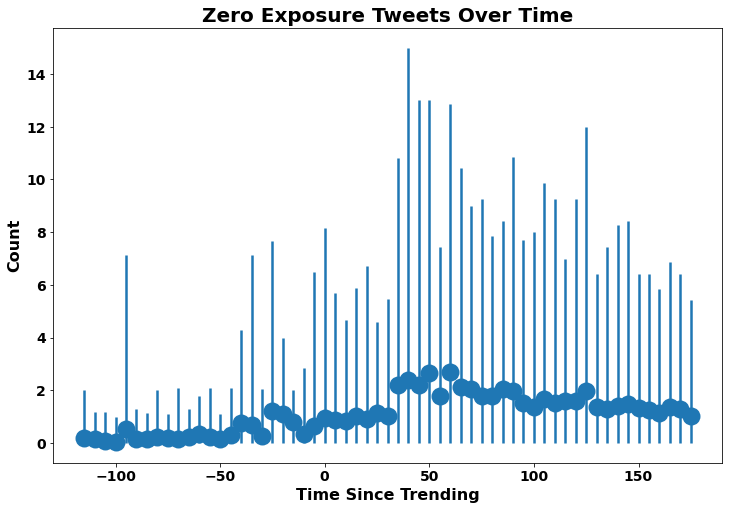

In [16]:
trending.plot_event_study(panel_df, upper=180)
plt.title('Zero Exposure Tweets Over Time')

Text(0.5, 1.0, 'Zero Exposure Tweets Over Time')

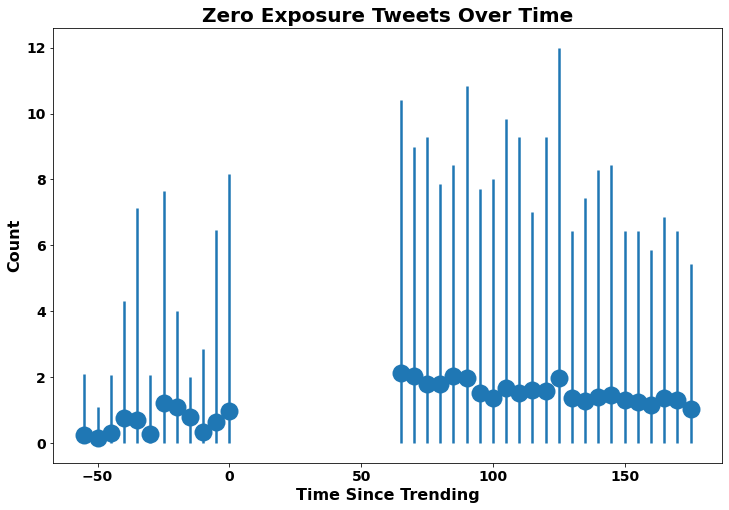

In [17]:
trending.plot_event_study(donut_hole, upper=180)
plt.title('Zero Exposure Tweets Over Time')

Text(0.5, 1.0, 'All New Tweets Over Time')

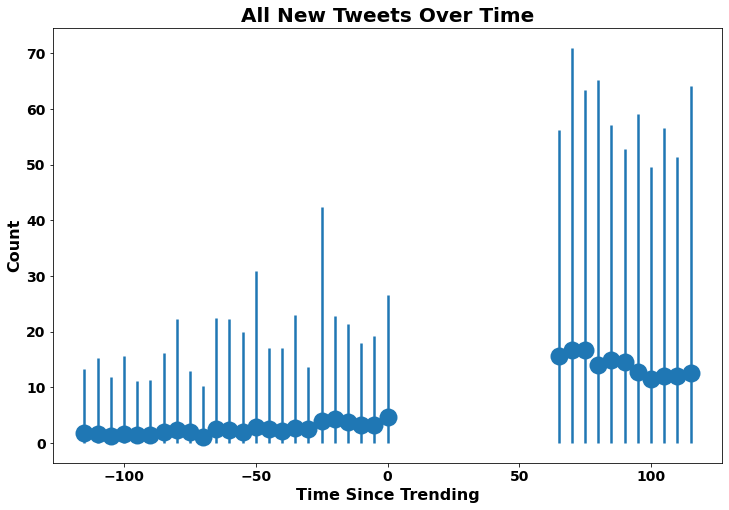

In [83]:
trending.plot_event_study(donut_hole, cat='regular')
plt.title('All New Tweets Over Time')

In [20]:
donut_hole

,template,template_retweet,regular,regular_retweet,nonzero_exposure_regular,zero_exposure_regular,total_engagement,rt_engagement,hashtag,time,time_i,time_i2,trending_start,inferred_trending_start,threshold
adj_date,,,,,,,,,,,,,,,
-55,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,jharkhandwithmodi,-55,48,2304,2019-02-17 15:30:00,0,0
-50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,jharkhandwithmodi,-50,49,2401,2019-02-17 15:30:00,0,0
-45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jharkhandwithmodi,-45,50,2500,2019-02-17 15:30:00,0,0
-40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jharkhandwithmodi,-40,51,2601,2019-02-17 15:30:00,0,0
-35,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,jharkhandwithmodi,-35,52,2704,2019-02-17 15:30:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,0.0,3.0,11.0,3.0,0.0,14.0,11.0,gappupappu,155,90,8100,2018-10-11 23:30:00,0,1
160,0.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,gappupappu,160,91,8281,2018-10-11 23:30:00,0,1
165,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,gappupappu,165,92,8464,2018-10-11 23:30:00,0,1


In [23]:
def adjust_time(x):
    if x <= 0:
        return x
    else:
        return x-60
donut_hole['adjusted_time'] = donut_hole.time.apply(adjust_time)

In [24]:
mod = smf.mixedlm("regular ~ time*threshold + nonzero_exposure_regular", 
            data=donut_hole, groups=donut_hole['hashtag']).fit()

In [25]:
mod.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:                MixedLM     Dependent Variable:     regular   
No. Observations:     1209        Method:                 REML      
No. Groups:           64          Scale:                  4.9092    
Min. group size:      11          Log-Likelihood:         -2735.4827
Max. group size:      23          Converged:              Yes       
Mean group size:      18.9                                          
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 0.592    0.214   2.767 0.006  0.173  1.011
time                      0.004    0.006   0.784 0.433 -0.007  0.016
threshold                 0.254    0.524   0.486 0.627 -0.772  1.281
time:threshold           -0.007    0.008  -0.954 0.340 -0.023  0.008
nonzero_exposure_regular  1.098    0.005 202.661 0.000  1.087  1.108
Group Var                 0.848    0.096                            
====================================================================

"""

In [55]:
mod = smf.ols("regular ~ time*threshold + C(hashtag)+ nonzero_exposure_regular", 
            data=donut_hole).fit()

In [53]:
mod = smf.mixedlm("regular ~ time*threshold + nonzero_exposure_regular", 
            data=donut_hole, groups=donut_hole['hashtag']).fit()

In [56]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                regular   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:28:01   Log-Likelihood:                -2641.4
No. Observations:                1209   AIC:                             5419.
Df Residuals:                    1141   BIC:                             5765.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.2885      0.490      2.627      0.009       0.326       2.251
C(hashtag)[T.andhrawithmodi]                -0.9825      0.654     -1.502      0.133      -2.266       0.301
C(hashtag)[T.armedforcesweek2018]           -1.1178      0.752     -1.486      0.138      -2.594       0.358
C(hashtag)[T.artisanspeak]                  -1.3006      0.653     -1.992      0.047      -2.582      -0.020
C(hashtag)[T.badalrahihaikashi]             -2.1687      0.661     -3.281      0.001      -3.466      -0.872
C(hashtag)[T.bjp4betterandhra]              -1.0422      0.653     -1.595      0.111      -2.324       0.240
C(hashtag)[T.bjp4jind]                      -1.2877      0.653     -1.972      0.049      -2.569      -0.007
C(hashtag)[T.bjpforsamridhkisan]            -0.6539      0.722     -0.906      0.365      -2.071       0.763
C(hashtag)[T.congaapbhaibhai]               -1.3010      0.653     -1.992      0.047      -2.582      -0.020
C(hashtag)[T.congressdefencescams]           1.6943      0.815      2.079      0.038       0.095       3.293
C(hashtag)[T.congresseurofighterscandal]     0.2082      0.815      0.255      0.798      -1.391       1.807
C(hashtag)[T.congressinsultsairforce]       -1.0626      0.816     -1.303      0.193      -2.663       0.538
C(hashtag)[T.copypastencp]                  -0.9896      0.668     -1.481      0.139      -2.301       0.322
C(hashtag)[T.corruptcongressfearsdemo]      -1.4833      0.654     -2.268      0.023      -2.766      -0.200
C(hashtag)[T.devendra4maharashtra]          -0.2670      0.654     -0.409      0.683      -1.549       1.015
C(hashtag)[T.dousupportnaxals]              -0.9302      0.653     -1.425      0.154      -2.211       0.351
C(hashtag)[T.facebookboomed]                -2.2269      0.816     -2.729      0.006      -3.828      -0.626
C(hashtag)[T.gappupappu]                    -1.4266      0.653     -2.184      0.029      -2.708      -0.145
C(hashtag)[T.himachalkacu]                  -1.3702      0.653     -2.098      0.036      -2.652      -0.089
C(hashtag)[T.iafbacksrafale]                -1.2094      0.653     -1.852      0.064      -2.490       0.072
C(hashtag)[T.indiabolemodidobara]           -0.6823      0.841     -0.811      0.417      -2.332       0.968
C(hashtag)[T.jaihindkisena]                 -1.1857      0.653     -1.816      0.070      -2.467       0.095
C(hashtag)[T.jaihobc]                       -0.8129      0.661     -1.231      0.219      -2.109       0.483
C(hashtag)[T.jharkhandwithmodi]             -0.5565      0.653     -0.852      0.394      -1.838       0.725
C(hashtag)[T.kiamadeinap]                   -0.7938      0.653     -1.216      0.224      -2.075       0.487
C(hashtag)[T.lawlessodisha]    

# Individual Hashtags

Is there some correlation between the causal effect of trending and other hashtag characteristics? 
Tweets prior to trending, time of the day, etc. 

In [4]:
meta_res = []
for hashtag, tweet_dict in tqdm(campaigns.items()):
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        res = trending.run_statistics(
            *trending.build_df(hashtag, tweet_dict, exposures, time_bin='5Min', plot=False), 
                                      periods=(12,12))
        meta_res.append(pd.concat({hashtag: res}, names=['Hashtag']))

Not enough periods in df, running on model from  2019-04-22 08:35:00 to 2019-04-22 09:55:00
Not enough periods in df, running on model from  2019-01-06 17:25:00 to 2019-01-06 18:45:00
Not enough periods in df, running on model from  2019-02-13 11:25:00 to 2019-02-13 13:00:00
Not enough periods in df, running on model from  2018-12-20 19:05:00 to 2018-12-20 20:00:00
Not enough periods in df, running on model from  2018-10-17 09:30:00 to 2018-10-17 10:40:00
Not enough periods in df, running on model from  2019-04-19 15:40:00 to 2019-04-19 17:15:00
Not enough periods in df, running on model from  2019-04-17 10:45:00 to 2019-04-17 12:05:00
Not enough periods in df, running on model from  2019-03-13 20:10:00 to 2019-03-13 22:00:00
Not enough periods in df, running on model from  2018-09-14 14:40:00 to 2018-09-14 15:40:00
Not enough periods in df, running on model from  2018-09-06 12:55:00 to 2018-09-06 14:05:00
Not enough periods in df, running on model from  2019-02-23 14:05:00 to 2019-02-

In [5]:
coefs = pd.concat(meta_res).reset_index().rename(columns={'level_2': 'variable'})

In [6]:
with open(os.path.join(TWITTER_DATA_DIR, 'trending_rankings.pkl'), 'rb') as f:
    res_dict = pickle.load(f)

In [20]:
top_rankings = {k: min(v) for k,v in res_dict.items()}
time_of_top_ranking = {k: v.index(min(v)) for k,v in res_dict.items()}

In [21]:
coefs['top_ranking'] = coefs.Hashtag.apply(lambda x: top_rankings[x])
coefs['time_of_top_ranking'] = coefs.Hashtag.apply(lambda x: time_of_top_ranking[x])

In [13]:
coefs

,Hashtag,Trial,variable,coef,std err,z,P>|z|,[0.025,0.975],top_ranking
0,jharkhandwithmodi,New Tweets,Intercept,-7.3849,5.489,-1.345,0.178,-18.142,3.373,4
1,jharkhandwithmodi,New Tweets,time_i,0.1533,0.110,1.389,0.165,-0.063,0.370,4
2,jharkhandwithmodi,New Tweets,threshold,73.5129,26.089,2.818,0.005,22.379,124.647,4
3,jharkhandwithmodi,New Tweets,time_i:threshold,-1.1296,0.410,-2.757,0.006,-1.933,-0.326,4
4,jharkhandwithmodi,New Tweets,nonzero_exposure_regular,0.8542,0.161,5.314,0.000,0.539,1.169,4
...,...,...,...,...,...,...,...,...,...,...
315,gappupappu,New Tweets,Intercept,6.7385,3.741,1.801,0.072,-0.593,14.070,18
316,gappupappu,New Tweets,time_i,-0.1027,0.065,-1.570,0.116,-0.231,0.026,18
317,gappupappu,New Tweets,threshold,0.4438,8.057,0.055,0.956,-15.348,16.236,18
318,gappupappu,New Tweets,time_i:threshold,0.0110,0.129,0.085,0.932,-0.243,0.265,18


<AxesSubplot:xlabel='coef', ylabel='top_ranking'>

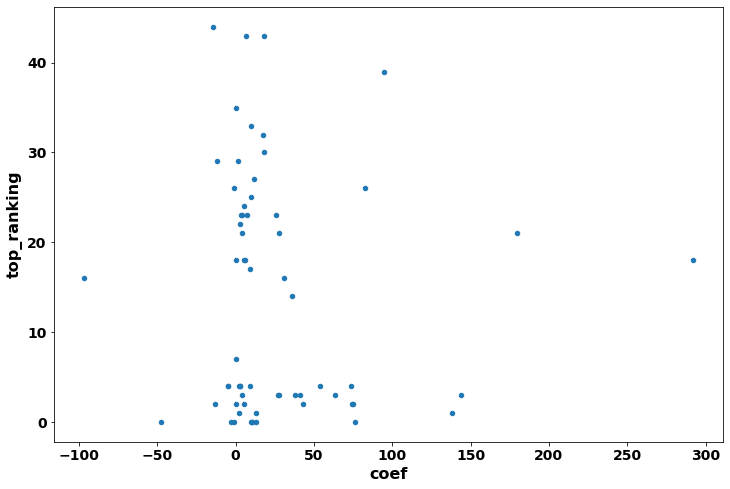

In [22]:
coefs.query('variable == "threshold"').plot(x='coef', y='top_ranking', kind='scatter')

<AxesSubplot:xlabel='coef', ylabel='time_of_top_ranking'>

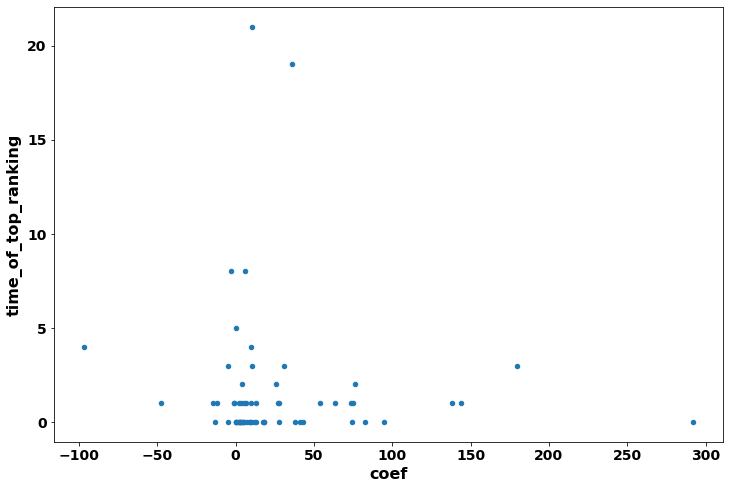

In [23]:
coefs.query('variable == "threshold"').plot(x='coef', y='time_of_top_ranking', kind='scatter')

<AxesSubplot:xlabel='z', ylabel='top_ranking'>

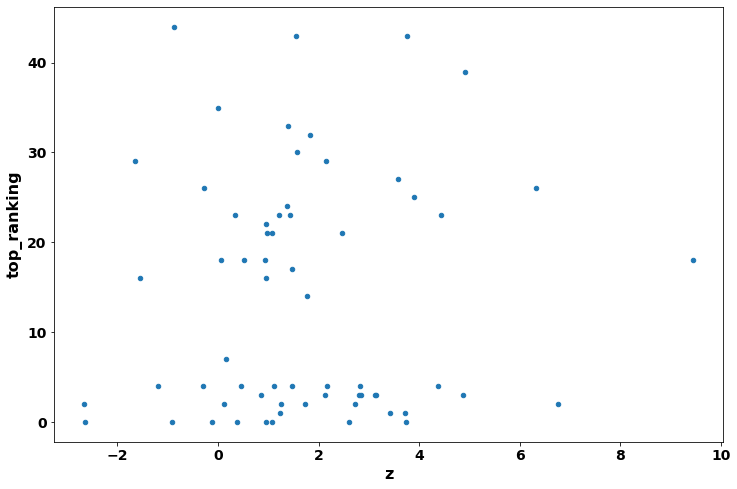

In [19]:
coefs.query('variable == "threshold"').plot(x='z', y='top_ranking', kind='scatter')

<AxesSubplot:xlabel='z', ylabel='time_of_top_ranking'>

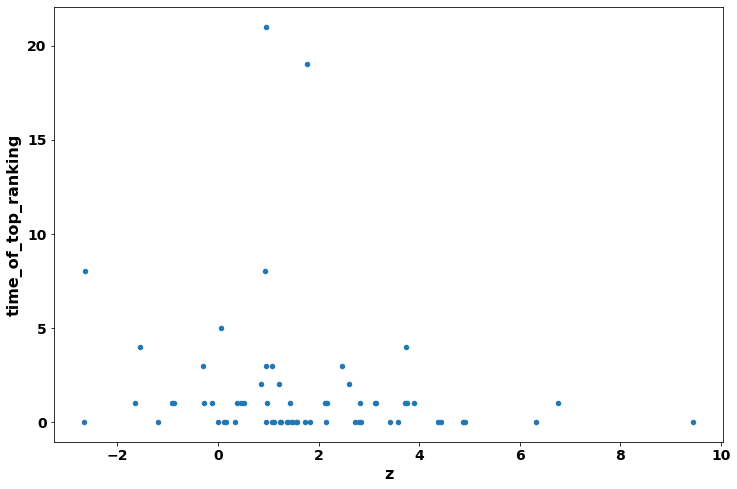

In [24]:
coefs.query('variable == "threshold"').plot(x='z', y='time_of_top_ranking', kind='scatter')

In [39]:
dfs = []
for hashtag, tweet_dict in campaigns.items():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        _, temp = trending.build_df(hashtag, tweet_dict, exposures, normalize_time=True, time_bin='5Min',
                                    cutoff_choice='earliest', include_missing=False, raw_df_too=True)
        temp['hashtag'] = hashtag
        dfs.append(temp)
        
panel_df = pd.concat(dfs)

In [48]:
panel_df = panel_df.assign(threshold=(panel_df.trending_start < panel_df.date).astype(int))

Variables to include
- tweets before trending 
- total tweets
- total retweets
- retweets before trending
- total templates 
- 

In [62]:
temp = {}
def get_hashtag_attrs(df):
    stats = {}
    tweets = df.query('type == "regular" or type == "template"')
    rts = df.query('type == "regular_retweet" or type == "template_retweet"')
    
    stats['total_tweets'] = len(tweets)
    stats['tweets_before_trending'] = len(tweets.query('threshold == 0'))

    stats['total_retweets'] = len(rts)
    stats['retweets_before_trending'] = len(rts.query('threshold == 0'))
    
    stats['total_templates'] = len(tweets.query('type == "template"'))
    temp[df.hashtag.iloc[0]] = stats
    
panel_df.groupby('hashtag').apply(get_hashtag_attrs)

""


In [71]:
t = coefs.query('variable == "threshold"')
t.index = t.Hashtag
t = t.join(pd.DataFrame.from_dict(temp).T)

In [72]:
t.columns

Index(['Hashtag', 'Trial', 'variable', 'coef', 'std err', 'z', 'P>|z|',
       '[0.025', '0.975]', 'total_tweets', 'tweets_before_trending',
       'total_retweets', 'retweets_before_trending', 'total_templates'],
      dtype='object')

In [77]:
mod = smf.ols("coef ~ total_tweets + tweets_before_trending + \
              total_retweets + retweets_before_trending + total_templates", data=t).fit()

In [78]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coef   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2.209
Date:                Tue, 09 Feb 2021   Prob (F-statistic):             0.0655
Time:                        12:43:06   Log-Likelihood:                -339.93
No. Observations:                  64   AIC:                             691.9
Df Residuals:                      58   BIC:                             704.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.5538      8.850      1.870      0.066      -1.162      34.269
total_tweets                -0.0058      0.006     -0.987      0.328      -0.018       0.006
tweets_before_trending      -0.0077      0.013     -0.587      0.560      -0.034       0.019
total_retweets               0.0034      0.005      0.652      0.517      -0.007       0.014
retweets_before_trending     0.0040      0.012      0.322      0.749      -0.021       0.029
total_templates              0.0304      0.011      2.836      0.006       0.009       0.052
==============================================================================
Omnibus:                       73.243   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              706.281
Skew:                           3.239   Prob(JB):                    4.30e-154
Kurtosis:                      17.930   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Average Trending Time

In [30]:
from config import TRENDS_DIR

In [31]:
dfs = []
for hashtag in campaigns.keys():
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        dfs.append(pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime']))

In [33]:
t=pd.concat(dfs)

In [42]:
t.query('hashtag == "jharkhandwithmodi"').datetime.min()

Timestamp('2019-02-17 10:00:00')

In [47]:
def compare_country_and_first(df):
    t1 = df.datetime.min()
    t2 = df.query('level == "Country"').datetime.min()
    t3 = df.query('level == "Country"').datetime.max()
    print('trended for', t3-t1)
    if t1 != t2:
        print(df.hashtag.iloc[0], '\nfirst', t1, '\ncountry:', t2)
t.groupby('hashtag').apply(compare_country_and_first)

trended for 0 days 02:00:00
trended for 0 days 19:00:00
trended for 1 days 17:00:00
trended for 0 days 03:00:00
trended for 0 days 22:00:00
trended for 0 days 20:00:00
trended for 0 days 05:00:00
trended for 0 days 07:00:00
trended for 0 days 07:00:00
trended for 0 days 16:00:00
trended for 0 days 23:00:00
trended for 0 days 06:00:00
trended for 0 days 01:00:00
trended for 0 days 18:00:00
corruptcongressfearsdemo 
first 2018-11-08 11:00:00 
country: 2018-11-08 17:00:00
trended for 0 days 05:00:00
trended for 0 days 13:00:00
trended for 0 days 05:00:00
trended for 0 days 09:00:00
trended for 0 days 02:00:00
trended for 0 days 14:00:00
trended for 1 days 21:00:00
trended for 0 days 22:00:00
trended for 0 days 00:00:00
trended for 0 days 06:00:00
trended for 0 days 05:00:00
trended for 0 days 14:00:00
trended for 1 days 01:00:00
trended for 2 days 18:00:00
trended for 0 days 23:00:00
trended for 0 days 02:00:00
mizoramwithmodi 
first 2018-11-24 03:00:00 
country: 2018-11-24 04:00:00
trend

""


In [49]:
t.query('hashtag == "jharkhandwithmodi" and level == "Country"').datetime.diff()

21                  NaT
43             01:00:00
65             01:00:00
87             01:00:00
109            01:00:00
131            01:00:00
152            01:00:00
175   -1 days +18:00:00
197            01:00:00
219            01:00:00
241            01:00:00
263            01:00:00
285            01:00:00
306            01:00:00
Name: datetime, dtype: timedelta64[ns]